# Basic Classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

C:\Users\shadowleaf\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

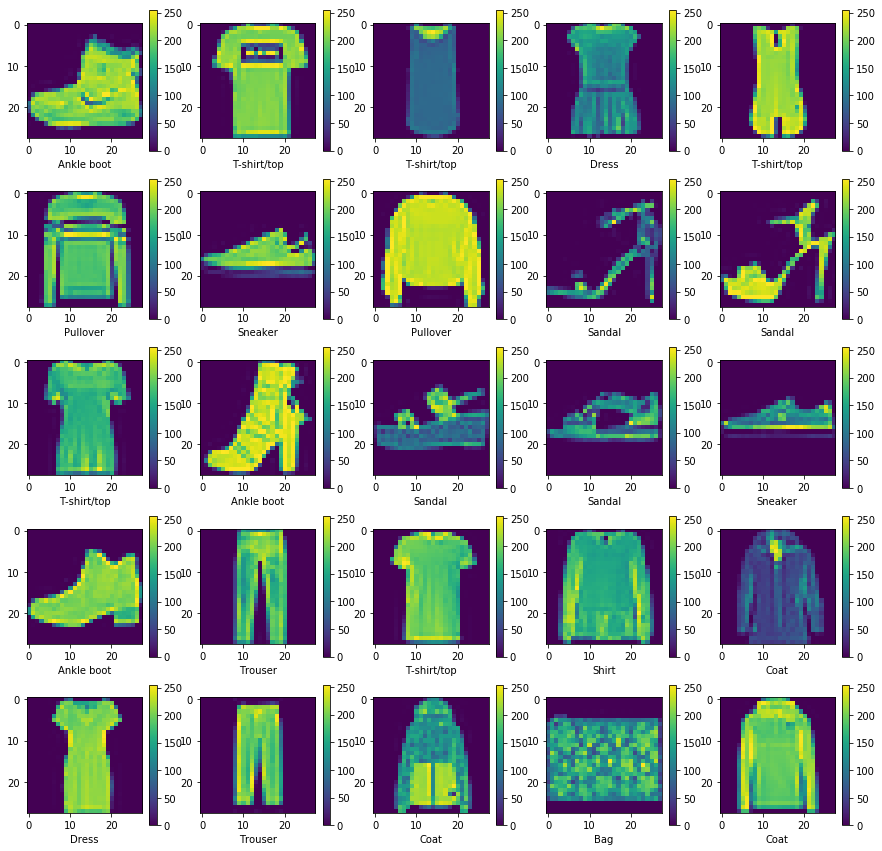

In [12]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.colorbar()
    plt.grid(False)

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

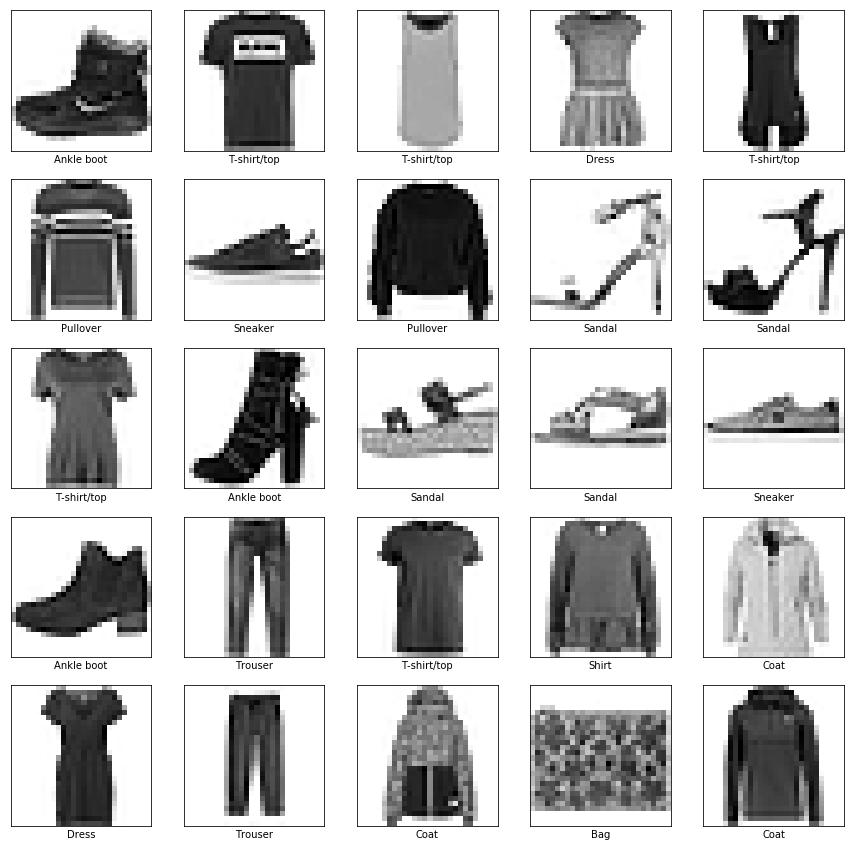

In [17]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3628 - acc: 0.8726
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3601 - acc: 0.8720
Epoch 3/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3567 - acc: 0.8734
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3550 - acc: 0.8747
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3526 - acc: 0.8749


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 81us/step
Test accuracy: 0.8579


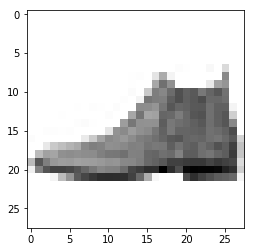

In [41]:
plt.imshow(test_images[0], cmap=plt.cm.binary)

In [32]:
predictions = model.predict(test_images)

In [34]:
predictions[0]

array([8.1576374e-08, 7.9762801e-09, 1.8705857e-06, 8.8038911e-07,
       7.7644618e-06, 2.2417994e-01, 1.1370684e-05, 7.1014084e-02,
       4.5072269e-03, 7.0027673e-01], dtype=float32)

In [36]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

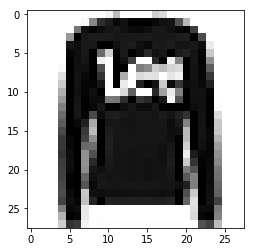

In [43]:
plt.imshow(test_images[1], cmap=plt.cm.binary)

In [38]:
class_names[np.argmax(predictions[1])]

'Pullover'

## Predicting the test images with the model

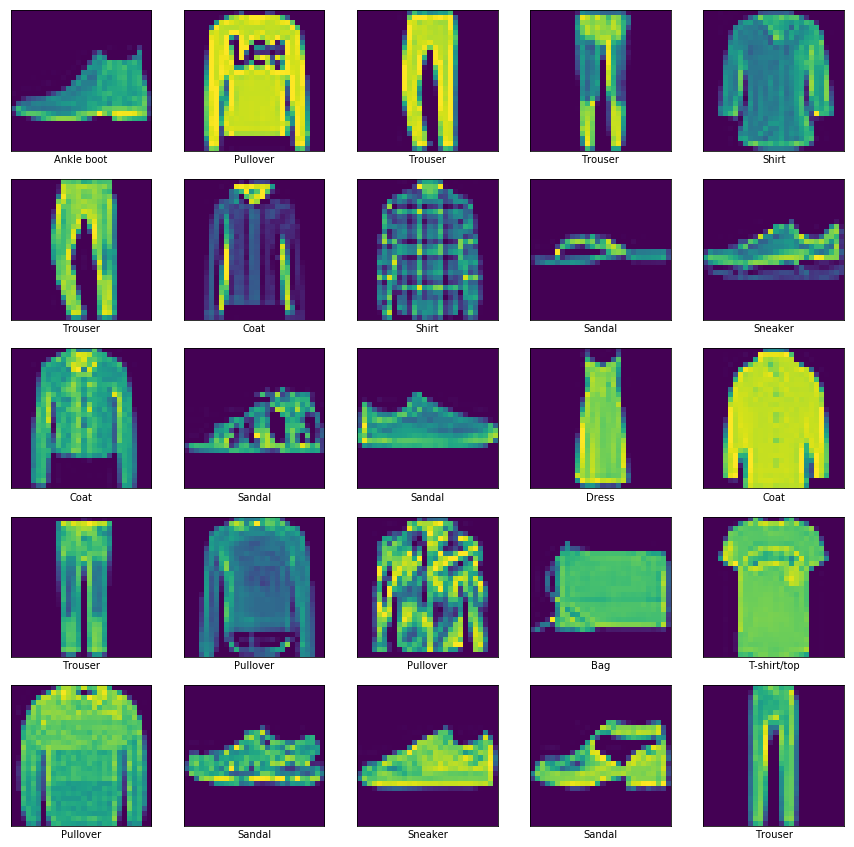

In [49]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(class_names[np.argmax(predictions[i])])